In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('milk_yield.csv')

In [8]:
df.head()

,date,Birth.Date,animal.num,Consumed,Yield,Counsumed.times,Total.Duration,avg.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,04-11-2015,22-02-2006,1010,0.48,9.36,1,216,5.41,1,5.32,4.57,0.00,5.21,8,11,9.702854
1,05-11-2015,22-02-2006,1010,5.39,30.06,2,947,8.56,2,6.84,6.31,6.55,6.45,8,11,9.705594
2,06-11-2015,22-02-2006,1010,7.03,27.01,4,811,7.48,3,6.61,6.68,6.63,6.66,8,11,9.708333
3,07-11-2015,22-02-2006,1010,5.06,24.10,1,663,13.08,4,6.93,6.79,6.68,7.04,8,11,9.711073
4,08-11-2015,22-02-2006,1010,11.69,36.41,3,837,8.01,5,6.70,6.77,6.59,6.71,8,11,9.713813


In [9]:
df.drop(columns = ['date','Birth.Date','avg.Duration','DaysInMilk','animal.num'],axis = 1,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37054 entries, 0 to 37053
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Consumed         37054 non-null  float64
 1   Yield            37054 non-null  float64
 2   Counsumed.times  37054 non-null  int64  
 3   Total.Duration   37054 non-null  int64  
 4   Conductivity.LF  36919 non-null  float64
 5   Conductivity.LR  36655 non-null  float64
 6   Conductivity.RF  36063 non-null  float64
 7   Conductivity.RR  36376 non-null  float64
 8   lactation        37054 non-null  int64  
 9   month            37054 non-null  int64  
 10  age              37054 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.1 MB


In [11]:
df[['Conductivity.LF','Conductivity.LR','Conductivity.RF','Conductivity.RR']]

,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR
0,5.32,4.57,0.00,5.21
1,6.84,6.31,6.55,6.45
2,6.61,6.68,6.63,6.66
3,6.93,6.79,6.68,7.04
4,6.70,6.77,6.59,6.71
...,...,...,...,...
37049,6.28,7.64,5.99,6.28
37050,6.42,6.31,6.00,5.96
37051,6.13,6.55,5.73,6.23
37052,6.53,6.55,6.22,6.23


In [12]:
df['Conductivity.LF']=df['Conductivity.LF'].fillna(df['Conductivity.LF'].median())
df['Conductivity.LR']=df['Conductivity.LR'].fillna(df['Conductivity.LR'].median())
df['Conductivity.RF']=df['Conductivity.RF'].fillna(df['Conductivity.RF'].median())
df['Conductivity.RR']=df['Conductivity.RR'].fillna(df['Conductivity.RR'].median())

In [13]:
df.isnull().sum()

Consumed           0
Yield              0
Counsumed.times    0
Total.Duration     0
Conductivity.LF    0
Conductivity.LR    0
Conductivity.RF    0
Conductivity.RR    0
lactation          0
month              0
age                0
dtype: int64

In [14]:
df.dtypes

Consumed           float64
Yield              float64
Counsumed.times      int64
Total.Duration       int64
Conductivity.LF    float64
Conductivity.LR    float64
Conductivity.RF    float64
Conductivity.RR    float64
lactation            int64
month                int64
age                float64
dtype: object

In [15]:
x = df.drop('Yield',axis = 1)
y = df['Yield']

In [16]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
model_base = lr.fit(x_train_1,y_train_1)
pred_base = model_base.predict(x_test_1)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_1,pred_base)))

rmse of base model is 6.166022124843856


In [18]:
df_copy = df.copy(deep = True)

In [19]:
df_copy

,Consumed,Yield,Counsumed.times,Total.Duration,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,0.48,9.36,1,216,5.32,4.57,0.00,5.21,8,11,9.702854
1,5.39,30.06,2,947,6.84,6.31,6.55,6.45,8,11,9.705594
2,7.03,27.01,4,811,6.61,6.68,6.63,6.66,8,11,9.708333
3,5.06,24.10,1,663,6.93,6.79,6.68,7.04,8,11,9.711073
4,11.69,36.41,3,837,6.70,6.77,6.59,6.71,8,11,9.713813
...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,3,461,6.28,7.64,5.99,6.28,7,7,10.544064
37050,5.47,18.38,3,545,6.42,6.31,6.00,5.96,7,7,10.546804
37051,5.62,19.44,2,436,6.13,6.55,5.73,6.23,7,7,10.549543
37052,6.51,22.46,2,386,6.53,6.55,6.22,6.23,7,7,10.552283


In [20]:
bins = [2,5,8,11,17]
df_copy['age'] = pd.cut(df_copy['age'],bins = bins,labels = ['Young_adult','mid_adult','senior_adult','mature_adult'])

In [21]:
df_copy

,Consumed,Yield,Counsumed.times,Total.Duration,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,0.48,9.36,1,216,5.32,4.57,0.00,5.21,8,11,senior_adult
1,5.39,30.06,2,947,6.84,6.31,6.55,6.45,8,11,senior_adult
2,7.03,27.01,4,811,6.61,6.68,6.63,6.66,8,11,senior_adult
3,5.06,24.10,1,663,6.93,6.79,6.68,7.04,8,11,senior_adult
4,11.69,36.41,3,837,6.70,6.77,6.59,6.71,8,11,senior_adult
...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,3,461,6.28,7.64,5.99,6.28,7,7,senior_adult
37050,5.47,18.38,3,545,6.42,6.31,6.00,5.96,7,7,senior_adult
37051,5.62,19.44,2,436,6.13,6.55,5.73,6.23,7,7,senior_adult
37052,6.51,22.46,2,386,6.53,6.55,6.22,6.23,7,7,senior_adult


In [22]:
bins = [0,3,6,9]
df_copy['lactation_new']=pd.cut(df_copy['lactation'],bins = bins,labels = ['early','mid','late'])

In [23]:
bins = [0,4,8,12,17]
df_copy['Counsumed.times_new']=pd.cut(df_copy['Counsumed.times'],bins = bins, labels = ['less','mid','average','late'])

In [24]:
df_copy

,Consumed,Yield,Counsumed.times,Total.Duration,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age,lactation_new,Counsumed.times_new
0,0.48,9.36,1,216,5.32,4.57,0.00,5.21,8,11,senior_adult,late,less
1,5.39,30.06,2,947,6.84,6.31,6.55,6.45,8,11,senior_adult,late,less
2,7.03,27.01,4,811,6.61,6.68,6.63,6.66,8,11,senior_adult,late,less
3,5.06,24.10,1,663,6.93,6.79,6.68,7.04,8,11,senior_adult,late,less
4,11.69,36.41,3,837,6.70,6.77,6.59,6.71,8,11,senior_adult,late,less
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,3,461,6.28,7.64,5.99,6.28,7,7,senior_adult,late,less
37050,5.47,18.38,3,545,6.42,6.31,6.00,5.96,7,7,senior_adult,late,less
37051,5.62,19.44,2,436,6.13,6.55,5.73,6.23,7,7,senior_adult,late,less
37052,6.51,22.46,2,386,6.53,6.55,6.22,6.23,7,7,senior_adult,late,less


In [25]:
bins = [0,3,6,9,12]
df_copy['month']=pd.cut(df_copy['month'],bins = bins, labels = ['spring','summer','autumn','winter'])

In [26]:
df_copy.drop(['Counsumed.times','lactation'],axis=1,inplace = True)

In [27]:
dummy_1=pd.get_dummies(df_copy[['age','lactation_new','Counsumed.times_new','month']])

In [28]:
df_copy.drop(['age','lactation_new','Counsumed.times_new','month'],axis = 1,inplace = True)

In [29]:
df_copy = pd.concat([df_copy,dummy_1],axis = 1)

In [30]:
df_copy

,Consumed,Yield,Total.Duration,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,age_Young_adult,age_mid_adult,age_senior_adult,...,lactation_new_mid,lactation_new_late,Counsumed.times_new_less,Counsumed.times_new_mid,Counsumed.times_new_average,Counsumed.times_new_late,month_spring,month_summer,month_autumn,month_winter
0,0.48,9.36,216,5.32,4.57,0.00,5.21,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,5.39,30.06,947,6.84,6.31,6.55,6.45,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,7.03,27.01,811,6.61,6.68,6.63,6.66,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,5.06,24.10,663,6.93,6.79,6.68,7.04,0,0,1,...,0,1,1,0,0,0,0,0,0,1
4,11.69,36.41,837,6.70,6.77,6.59,6.71,0,0,1,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,461,6.28,7.64,5.99,6.28,0,0,1,...,0,1,1,0,0,0,0,0,1,0
37050,5.47,18.38,545,6.42,6.31,6.00,5.96,0,0,1,...,0,1,1,0,0,0,0,0,1,0
37051,5.62,19.44,436,6.13,6.55,5.73,6.23,0,0,1,...,0,1,1,0,0,0,0,0,1,0
37052,6.51,22.46,386,6.53,6.55,6.22,6.23,0,0,1,...,0,1,1,0,0,0,0,0,1,0


In [31]:
x = df_copy.drop('Yield',axis = 1)
y = df_copy['Yield']

In [32]:
from sklearn.model_selection import train_test_split
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
model_base_1 = lr.fit(x_train_2,y_train_2)
pred_base_1 = model_base_1.predict(x_test_2)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_2,pred_base_1)))

rmse of base model is 6.172306514781481


In [34]:
import mlxtend.feature_selection

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LinearRegression()

sfs_forward= SequentialFeatureSelector(estimator = lr,
                                           k_features=5,
                                           forward = True,
                                           verbose=2,
                                           scoring = "neg_root_mean_squared_error")

In [36]:
sfs_forward.fit(x_train_1,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-08-25 07:54:02] Features: 1/5 -- score: -7.192373022847955[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-25 07:54:02] Features: 2/5 -- score: -6.529588834965057[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-08-25 07:54:03] Features: 3/5 -- score: -6.386521094755176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [37]:
features = list(sfs_forward.k_feature_names_)

In [38]:
x_train_3 = x_train_1.loc[:,features]
x_test_3 = x_test_1.loc[:,features]

In [39]:
lr = LinearRegression()
model_3 = lr.fit(x_train_3,y_train_1)
pred_base_2 = model_3.predict(x_test_3)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_1,pred_base_2)))

rmse of base model is 6.218053079414444


In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LinearRegression()

sfs_forward_best= SequentialFeatureSelector(estimator = lr,
                                           k_features='best',
                                           forward = True,
                                           verbose=2,
                                           scoring = "neg_root_mean_squared_error")

In [41]:
sfs_forward_best.fit(x_train_1,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-08-25 07:54:03] Features: 1/10 -- score: -7.192373022847955[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-08-25 07:54:03] Features: 2/10 -- score: -6.529588834965057[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-08-25 07:54:03] Features: 3/10 -- score: -6.386521094755176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 10),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [42]:
features = list(sfs_forward_best.k_feature_names_)

In [43]:
x_train_4 = x_train_1.loc[:,features]
x_test_4 = x_test_1.loc[:,features]

In [44]:
lr = LinearRegression()
model_3 = lr.fit(x_train_4,y_train_1)
pred_base_3 = model_3.predict(x_test_4)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_1,pred_base_3)))

rmse of base model is 6.166022124843856


In [45]:
sfs_backward= SequentialFeatureSelector(estimator = lr,
                                           k_features=5,
                                           forward = False,
                                           verbose=2,
                                           scoring = "neg_root_mean_squared_error")

In [46]:
sfs_backward.fit(x_train_1,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-08-25 07:54:05] Features: 9/5 -- score: -6.219050356510735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-08-25 07:54:05] Features: 8/5 -- score: -6.224087914995311[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-08-25 07:54:05] Features: 7/5 -- score: -6.232596092236008[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(5, 5),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [47]:
features = list(sfs_backward.k_feature_names_)

In [48]:
x_train_5 = x_train_1.loc[:,features]
x_test_5 = x_test_1.loc[:,features]

In [49]:
lr = LinearRegression()
model_4 = lr.fit(x_train_5,y_train_1)
pred_base_4 = model_4.predict(x_test_5)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_1,pred_base_4)))

rmse of base model is 6.218053079414444


In [50]:
lr = LinearRegression()

sfs_backward_best= SequentialFeatureSelector(estimator = lr,
                                           k_features='best',
                                           forward = False,
                                           verbose=2,
                                           scoring = "neg_root_mean_squared_error")

In [51]:
sfs_backward_best.fit(x_train_1,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-08-25 07:54:06] Features: 9/1 -- score: -6.219050356510735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-08-25 07:54:06] Features: 8/1 -- score: -6.224087914995311[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-08-25 07:54:07] Features: 7/1 -- score: -6.232596092236008[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 10),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [52]:
features = list(sfs_backward_best.k_feature_names_)

In [53]:
x_train_6 = x_train_1.loc[:,features]
x_test_6 = x_test_1.loc[:,features]

In [54]:
lr = LinearRegression()
model_5 = lr.fit(x_train_6,y_train_1)
pred_base_5 = model_5.predict(x_test_6)
print('rmse of base model is',np.sqrt(mean_squared_error(y_test_1,pred_base_5)))

rmse of base model is 6.166022124843856


In [55]:
from sklearn.feature_selection import RFE
lr = LinearRegression()

In [56]:
rfe = RFE(estimator = lr,
         n_features_to_select = 5)

In [57]:
rfe.fit(x_train_1,y_train_1)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [58]:
pd.DataFrame(rfe.ranking_,index = x_train_1.columns)

,0
Consumed,1
Counsumed.times,1
Total.Duration,6
Conductivity.LF,5
Conductivity.LR,1
Conductivity.RF,4
Conductivity.RR,1
lactation,1
month,3
age,2


In [59]:
feature_index = pd.Series(rfe.ranking_,index = x_train_1.columns).sort_values(ascending = False)

In [60]:
impfeature_rfe = feature_index[feature_index==1].index

In [61]:
impfeature_rfe

Index(['Consumed', 'Counsumed.times', 'Conductivity.LR', 'Conductivity.RR',
       'lactation'],
      dtype='object')

In [62]:
rfe_train = x_train_1.loc[:,impfeature_rfe]
rfe_test = x_test_1.loc[:,impfeature_rfe]

In [63]:
lr = LinearRegression()

model_6 = lr.fit(rfe_train,y_train_1)
pred_6 = model_6.predict(rfe_test)
rfe_rmse = np.sqrt(mean_squared_error(y_test_1,pred_6))
print(rfe_rmse)

6.9345251895438675


In [64]:
num = df[['Consumed','Yield','Total.Duration','Conductivity.LF','Conductivity.LR','Conductivity.RF','Conductivity.RR','age']].columns.to_list()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


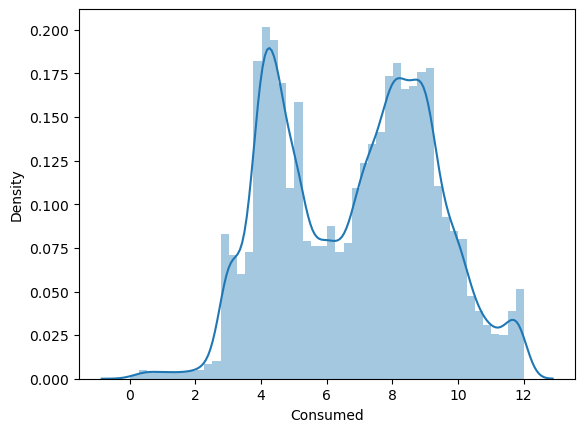

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


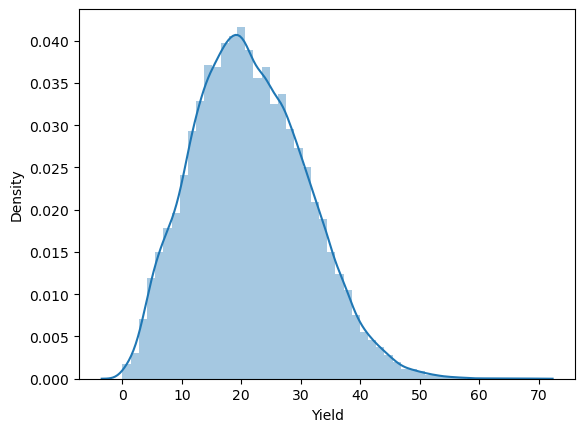

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


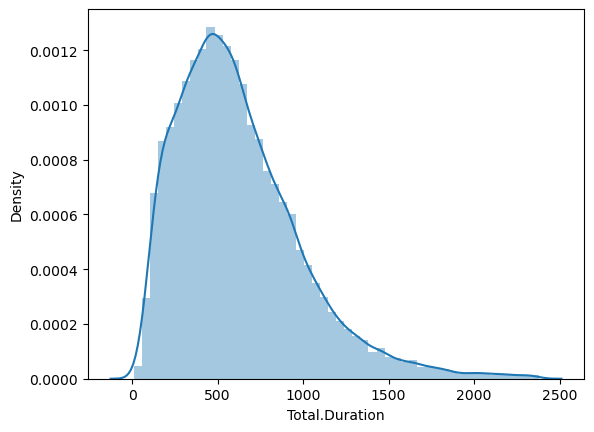

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


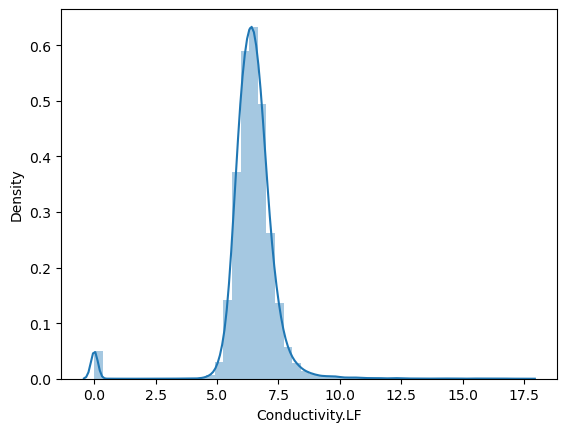

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


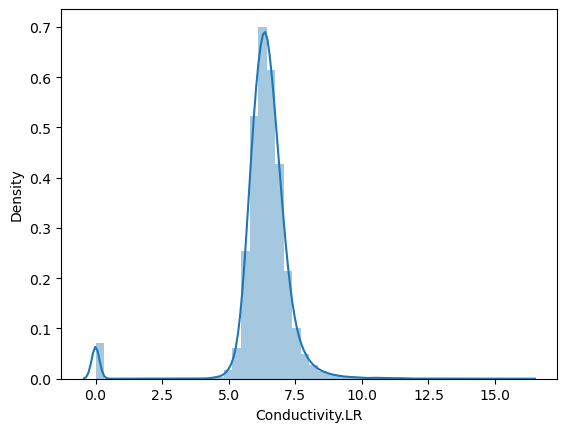

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


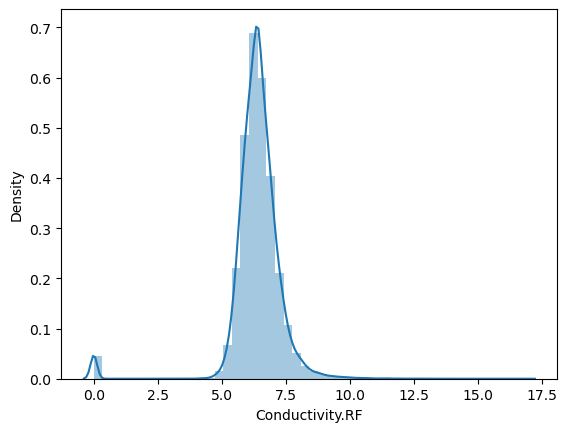

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


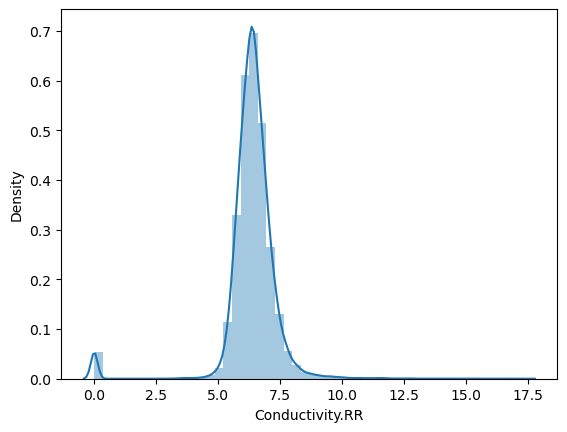

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


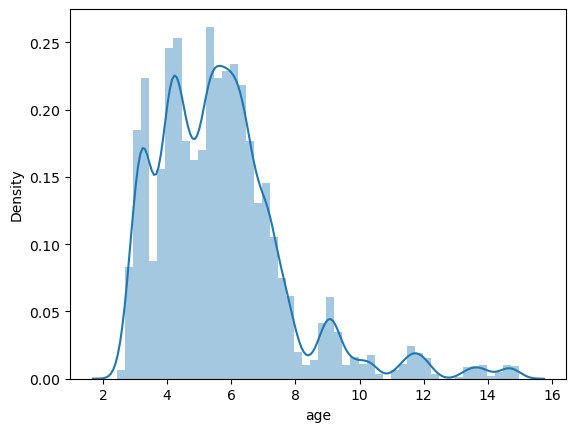

In [65]:
for i in num:
    sns.distplot(df[i])
    plt.show()

In [66]:
from sklearn.preprocessing import PowerTransformer

In [67]:
x = df.drop('Yield',axis = 1)
y = df['Yield']

In [68]:
from sklearn.model_selection import train_test_split
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [69]:
x_train_p_num= x_train_p[['Consumed','Total.Duration','Conductivity.LF','Conductivity.LR','Conductivity.RF','Conductivity.RR','age']]
x_test_p_num= x_test_p[['Consumed','Total.Duration','Conductivity.LF','Conductivity.LR','Conductivity.RF','Conductivity.RR','age']]                    
x_train_p_cat= x_train_p[['Counsumed.times', 'lactation', 'month']]
x_test_p_cat= x_test_p[['Counsumed.times', 'lactation', 'month']]

In [70]:
pt = PowerTransformer()
x_train_p_num=pd.DataFrame(pt.fit_transform(x_train_p_num),columns=x_train_p_num.columns)
x_test_p_num=pd.DataFrame(pt.fit_transform(x_test_p_num),columns=x_test_p_num.columns)

In [71]:
x_test_p_num

,Consumed,Total.Duration,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,age
0,0.698150,-0.304656,0.128016,0.241657,0.221586,0.409482,0.771358
1,1.822913,1.262687,-0.140499,-0.011147,-0.068279,0.129766,-2.109189
2,1.635767,-0.138270,-0.327964,-0.337363,-0.327132,-0.240217,-0.708170
3,-0.497094,-0.581495,-0.318677,0.064819,-0.187959,-0.230421,-1.350375
4,-1.262570,1.318300,1.443580,0.620522,1.556409,1.297375,0.440238
...,...,...,...,...,...,...,...
11112,0.995836,0.918003,0.423481,0.422964,2.413637,3.715440,0.388269
11113,-1.205024,-1.534448,0.635039,0.053915,-0.241778,0.129766,0.611355
11114,1.391548,-0.094584,-0.548108,-0.439058,-0.358900,-0.500407,-1.542436
11115,0.743176,-0.349058,0.574199,1.685048,0.650999,0.483334,2.150658


In [72]:
x_train_p_cat.index=np.arange(0,25937)
x_train_p_num.index=np.arange(0,25937)

In [73]:
x_test_p_cat.index=np.arange(0,11117)
x_test_p_num.index=np.arange(0,11117)

In [74]:
x_train_p_transformed= pd.concat([x_train_p_num,x_train_p_cat],axis=1)
x_test_p_transformed= pd.concat([x_test_p_num,x_test_p_cat],axis=1)

In [75]:
lr = LinearRegression()

model_p = lr.fit(x_train_p_transformed,y_train_p)
pred_p = model_p.predict(x_test_p_transformed)
print('rmse is',np.sqrt(mean_squared_error(y_test_p,pred_p)))

rmse is 6.090514259160072
